# Disission trees

In [ ]:
!pip install scikit-learn 
#Sklearn is the most used populare ML library in python


In [70]:
from sklearn.tree import DecisionTreeRegressor


In [128]:
#do everythin we did before:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = pd.read_csv ("mpg.csv") #import iris data as dataframe
df.drop(["name"], axis = 1, inplace = True) #drop the name of the car as it is not needed

#use integer encoding to change the origen column to a number
df["origin"] = df["origin"].astype('category')
origin_mapping = dict(enumerate(df['origin'].cat.categories)) #save the map for later if needed
df['origin'] = df['origin'].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int8   
dtypes: float64(3), int64(3), int8(1), object(1)
memory usage: 22.3+ KB


In [ ]:
df['horsepower'].unique() #check the unique values of horsepower

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [ ]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
#drop all null values
df.dropna(inplace = True) 


X = df.drop(columns=['mpg', 'origin',"displacement"]) #change these values to the ones you do not want in your prediction
y = df['mpg']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   horsepower    392 non-null    float64
 2   weight        392 non-null    int64  
 3   acceleration  392 non-null    float64
 4   model_year    392 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 18.4 KB


In [115]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [116]:
model = DecisionTreeRegressor()
model.fit(X,y)
X.head()

,cylinders,displacement,horsepower,acceleration,model_year
0,8,307.0,130.0,12.0,70
1,8,350.0,165.0,11.5,70
2,8,318.0,150.0,11.0,70
3,8,304.0,150.0,12.0,70
4,8,302.0,140.0,10.5,70


In [80]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0


In [83]:
predictions = model.predict(X)
predictions

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 15. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 27. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 19. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 18. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 17.5, 14. , 18. , 22. ,
       23. , 26. , 22. , 24. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 14. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 13. , 13. , 13. , 11. , 18. , 26. , 21. , 25. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 21.6, 11. , 20. , 19. , 15. , 31. , 25. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 17.5, 25. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 28. , 31. , 19

Rememer you need 3 sets of data. Lets do that now.

In [81]:
from sklearn.metrics import r2_score



R² Score (Coefficient of Determination)

Measures: How well your model explains the variance in the target variable.

Range: Typically between 0 and 1 (can be negative for very bad models).

- R² = 1.0 → perfect prediction.

- R² = 0.0 → model predicts no better than the mean.

- R² < 0 → model performs worse than just guessing the average.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
score0_2 = r2_score(y_test, prediction)
print("R² score:", score0_2)

R² score: 0.6362305760716849


MAE (Mean Absolute Error)

Measures: The average of the absolute differences between predictions and actual values.

- Range: 0 to ∞
    - MAE = 0 → perfect predictions.

A high MAE means your model is often far off from the real values.

In [84]:
from sklearn.metrics import mean_absolute_error
mae0_2 = mean_absolute_error(y_test, prediction)
print("MAE:", mae0_2)

MAE: 2.429113924050633


In [85]:
print(df.shape)
X_test

(392, 8)


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
309,4,98.0,76.0,2144,14.7,80,1
165,8,262.0,110.0,3221,13.5,75,0
103,8,400.0,150.0,4997,14.0,73,0
368,4,112.0,88.0,2640,18.6,82,0
162,6,258.0,110.0,3730,19.0,75,0
...,...,...,...,...,...,...,...
277,6,163.0,133.0,3410,15.8,78,1
239,4,97.0,67.0,1985,16.4,77,2
47,6,250.0,100.0,3282,15.0,71,0
265,8,318.0,140.0,4080,13.7,78,0


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
score = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
print(X_test.shape)
print("R² score:", score)
print("MAE:", mae)
print("R² score Original :", score0_2)
print("MAEO riginal:", mae0_2)

(79, 5)
R² score: 0.7915893274212639
MAE: 2.570886075949367
R² score Original : 0.6362305760716849
MAEO riginal: 2.429113924050633


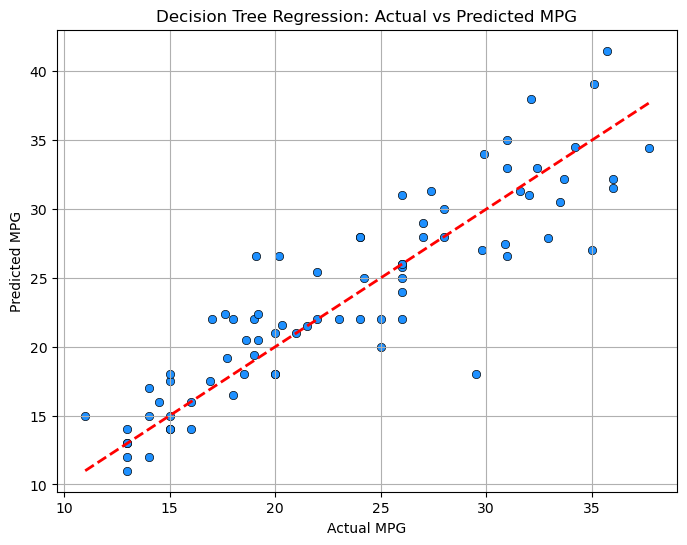

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Actual vs Predicted scatter plot
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=prediction, color='dodgerblue', edgecolor='black')

# Line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Decision Tree Regression: Actual vs Predicted MPG with dropped Weight")
plt.grid(True)
plt.show()

In [ ]:

y_train

262    19.2
226    20.5
212    16.5
300    23.9
17     21.0
159    14.0
175    29.0
251    20.2
199    20.0
164    21.0
53     31.0
165    20.0
324    40.8
224    15.0
112    19.0
104    12.0
93     14.0
162    15.0
303    31.8
Name: mpg, dtype: float64

In [107]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
262,8,305.0,145.0,3425,13.2,78,0
226,6,231.0,105.0,3425,16.9,77,0
212,8,350.0,180.0,4380,12.1,76,0
300,8,260.0,90.0,3420,22.2,79,0
17,6,200.0,85.0,2587,16.0,70,0
159,8,351.0,148.0,4657,13.5,75,0
175,4,90.0,70.0,1937,14.0,75,1
251,8,302.0,139.0,3570,12.8,78,0
199,6,225.0,100.0,3651,17.7,76,0
164,6,231.0,110.0,3039,15.0,75,0


# Model persistance

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib #this is a way to save the models 

df = pd.read_csv ("music.csv") #import iris data as dataframe

X = df.drop(columns=['genre'])
y = df['genre']
model = DecisionTreeClassifier()
model.fit(X,y)
joblib.dump(model, 'musik-recomender.joblib')




In [ ]:
model = joblib.load('musik-recomender.joblib')
predictions = model.predict([ [21,1]])
predictions

## Simple Linear Regression

Stay with me now: 

model the relationship between one feature (x) and one response variable (y) using the following equation:
y=β0+β1x+ε

- y: the outcome we are trying to predict (e.g., fuel efficiency, test score)
- x: the feature used to make predictions (e.g., horsepower, hours studied)
- β0​: the intercept (value of y when x=0)
- β1​: the slope coefficient (change in y for each unit increase in x)
- ε: the error term (captures the variation not explained by the model)

TLDR:
- y = MPG (target)
- x = horsepower (feature)
- β0​ = intercept
- β1​ = slope coefficient
- ε = error term



The objective of linear regression is to find values for β0​ and β1​ that minimize the total squared differences between the predicted values  of y and the actual observed values of y.


**Linear regression** is not just a predictive tool—it's also interpretive. It helps us:

- Understand relationships between variables

- Identify causal patterns (in experimental settings)

- Provide baseline models in complex systems


Note: to use linear regression the data needs to be able to be linear and independent and the data needs to be loosely correlated.  


In [ ]:
!pip install scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="darkgrid")


In [ ]:
X = df[["horsepower"]]
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")


In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train["horsepower"], y=y_train, label="Training Data")
sns.lineplot(x=X_train["horsepower"], y=model.predict(X_train), color="red", label="Regression Line")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower with Linear Regression Line")
plt.legend()
plt.show()
